## Bouton density

First, some packages needs to be imported.

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
import json
from pathlib import Path

# package to work with the circuit
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
import neurom as nm

Reading and preparing the data

In [6]:
circuit_path = '/home/data-bbp/20191017/circuit/sonata/circuit_config.json'
circuit = Circuit(circuit_path, node_population='All', edge_population='All')

In [18]:
print(circuit._config)

#hack for morphology path 
circuit._config['components']['morphologies_dir'] = "/home/data-bbp/20191017/entities/morphologies/20180417/v1"
print(circuit.nodes._circuit.config['components']['morphologies_dir'])

{'components': {'morphologies_dir': '/home/data-bbp/20191017/entities/morphologies/20180417/v1'}, 'networks': {'nodes': [{'nodes_file': '/home/data-bbp/20191017/circuit/sonata/networks/nodes/All/nodes.h5', 'node_types_file': None, 'node_sets_file': '/home/data-bbp/20191017/circuit/sonata/networks/nodes/All/node_sets.json'}], 'edges': [{'edges_file': '/home/data-bbp/20191017/circuit/sonata/networks/edges/functional/All/edges.h5', 'edge_types_file': None}]}}
/home/data-bbp/20191017/entities/morphologies/20180417/v1


In [14]:
# !ls /home/data-bbp/20191017/entities/morphologies/20180417/ascii/

In [15]:
sample = 5000
mtypes = circuit.nodes.property_values(Cell.MTYPE)

In [16]:
df = pd.DataFrame(index=mtypes, columns=['mean', 'std'])

In [17]:
def sample_bouton_density(circuit, sample, group=None, synapses_per_bouton=1.0):
    def _calc_bouton_density(gid, synapses_per_bouton):
        synapse_count = len(circuit.edges.efferent_edges(gid))
        axon_length = nm.get(
            'neurite_lengths', circuit.nodes.morph.get(gid, False), neurite_type=nm.AXON
        )[0]
        return (1.0 * synapse_count / synapses_per_bouton) / axon_length

    gids = circuit.nodes.ids(group)
    print(gids)
    if len(gids) > sample:
        gids = np.random.choice(gids, size=n, replace=False)
    return np.array([_calc_bouton_density(gid, synapses_per_bouton) for gid in gids])


for mtype in mtypes:
    data = sample_bouton_density(circuit, sample, group={Cell.MTYPE: mtype, Cell.REGION: {'$regex': 'mc2.*'}}, synapses_per_bouton=1.15) 
    df.loc[mtype]['mean'] = data.mean()
    df.loc[mtype]['std'] = data.std()

df.head()

[16900 16904 16926 16928 16949 16962 16966 16967 16971 16983 16984 16986
 16997 16998 17007 17011 17015 17035 17036 17040 17058 17061 17062 17066
 17073 17074 17089 17092 17093 17099 17105 17116 17117 17120 17132 17137
 17140 17148 17155 17170 17173 17178 17179 17193]


BlueSnapError: No such population: 'All'

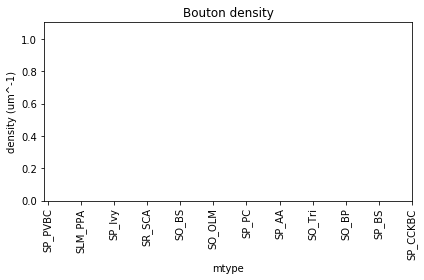

In [19]:
plt.close('all')

fig, ax = plt.subplots()

labels = mtypes
ind = np.arange(len(labels))
width = 0.75

s = ax.bar(ind, df['mean'], width, yerr=df.loc[mtype]['std'])

ax.set_xlabel('mtype')
ax.set_ylabel('density (um^-1)')
ax.set_title('Bouton density')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')

fig.tight_layout()

fig.show()

In [20]:
# reference biological dataset
bio_path = '/home/data-bbp/20191017/circuit/bioname/bouton_density_20190131.tsv'

In [21]:
data = pd.read_csv(bio_path, names=['mtype', 'bio_mean', 'bio_std'], skiprows=2, usecols=[0,1,2], delim_whitespace=True)
data.head()

,mtype,bio_mean,bio_std
0,SO_BS,0.2100,0.0
1,SO_BP,0.2480,0.0
2,SP_PC,0.1241,0.0
3,SO_Tri,0.2820,0.0
4,SP_PVBC,0.2260,0.0


In [22]:
selected = data['mtype'].values
data['mod_mean'] = df.loc[selected]['mean'].values
data['mod_std'] = df.loc[selected]['std'].values
data.head()

,mtype,bio_mean,bio_std,mod_mean,mod_std
0,SO_BS,0.2100,0.0,NaN,NaN
1,SO_BP,0.2480,0.0,NaN,NaN
2,SP_PC,0.1241,0.0,NaN,NaN
3,SO_Tri,0.2820,0.0,NaN,NaN
4,SP_PVBC,0.2260,0.0,NaN,NaN


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:30: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


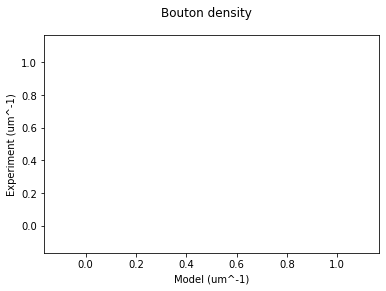

In [23]:
plt.close('all')

x = data['mod_mean'].values
y = data['bio_mean'].values
# remove nan value from the array
# l = np.linspace(0, max(x[~np.isnan(x)].max(), y.max()), 50)
l = np.linspace(0, max(x.max(), y.max()), 50)
fig, ax = plt.subplots()
fig.suptitle('Bouton density')
ax.plot(x, y, 'o')
ax.errorbar(x, y, xerr=data['mod_std'].values, yerr=data['bio_std'].values, fmt='o', ecolor='g', capthick=2)
ax.plot(l, l, 'k--')
ax.set_xlabel('Model (um^-1)')
ax.set_ylabel('Experiment (um^-1)')

fig.show()

In [ ]:
# Work here

### Exercise #1
Calculate the average bouton density in an interneuron and a neuron in general. Store the answer in ans_1a and ans_1b.

__Hint__: to query gids of interneurons use Cell.SYNAPSE_CLASS. When you query all the interneurons, you do not need any filters.

### Exercise #2
Calculate bouton density not in the central column. Is it lower, bigger or the same of the bouton density calculated in the central column? Why?

In [ ]:
# This is to generate the answers to paste in the submission box below.
# Run this and copy-paste the output into the box below
print json.dumps(dict([("ans_1a", ans_1a),
                       ("ans_1b", ans_1b),
                       ("ans_2a", ans_2a),
                       ("ans_2b", ans_2b)]))

In [ ]:
!pip -q install -i https://bbpteam.epfl.ch/repository/devpi/simple/ single-cell-mooc-client==0.0.5 
import single_cell_mooc_client as sc_mc
s = sc_mc.Submission(hideToken=True)

In [ ]:
s.show_submission(ROLLBACK, TOKEN)